# Evaluación usando matriz de confusión

---



**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Mayo 2025

**Versión:** 1.0  



---

## Descripción

Este notebook muestra la evaluación de un modelo de clasificación usando matriz de confusión y otras métricas.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- matplotlib (3.10.0)
- pandas (2.2.2)
- seaborn (0.13.2)
- sklearn (1.6.1)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [3]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/Machine-Learning/main/data/diabetes_mc.csv
!wget https://raw.githubusercontent.com/JaznaLaProfe/Machine-Learning/main/data/doctors.csv

--2025-05-28 10:56:37--  https://raw.githubusercontent.com/JaznaLaProfe/Machine-Learning/main/data/diabetes_mc.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791416 (773K) [text/plain]
Saving to: ‘diabetes_mc.csv’

diabetes_mc.csv     100%[===================>] 772.87K  --.-KB/s    in 0.006s  

2025-05-28 10:56:38 (129 MB/s) - ‘diabetes_mc.csv’ saved [791416/791416]

--2025-05-28 10:56:38--  https://raw.githubusercontent.com/JaznaLaProfe/Machine-Learning/main/data/doctors.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, log_loss, roc_curve, auc, classification_report

In [12]:
diabetes_df = pd.read_csv('diabetes_mc.csv')
diabetes_df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


Verifica la forma y si existen valores faltantes.

In [6]:
diabetes_df.shape

(15000, 10)

In [13]:
diabetes_df.isna().any()

,0
PatientID,False
Pregnancies,False
PlasmaGlucose,False
DiastolicBloodPressure,False
TricepsThickness,False
SerumInsulin,False
BMI,False
DiabetesPedigree,False
Age,False
Diabetic,False


Revisión de la distribución de cada columna, esto ayudará a elegir el método de normalización de características más ideal.

Primero, se define una función que represente la distribución de cada característica.

In [15]:
def plot_features(data : pd.DataFrame):
    plt.figure(figsize=(20, 10))
    sns.set(font_scale=1.2)
    sns.set_style('ticks') # change background to white background
    plt.suptitle('Visualización de Distribución', y=0.95, fontweight="bold")

    plt.subplot(241)
    color_list = ['gold','purple','brown']
    data.Age.plot(kind='hist', color='brown')
    plt.xlabel('Age')
    plt.ylabel('Frequency')

    plt.subplot(242)
    color_list = ['gold','purple','brown']
    data.Pregnancies.plot(kind='hist', color='brown')
    plt.xlabel('Pregnancies')
    plt.ylabel('Frequency')

    plt.subplot(243)
    color_list = ['gold','purple','brown']
    data.PlasmaGlucose.plot(kind='hist', color='brown')
    plt.xlabel('PlasmaGlucose')
    plt.ylabel('Frequency')

    plt.subplot(244)
    color_list = ['gold','purple','brown']
    data.DiastolicBloodPressure.plot(kind='hist', color='brown')
    plt.xlabel('DiastolicBP')
    plt.ylabel('Frequency')

    plt.subplot(245)
    color_list = ['gold','purple','brown']
    data.TricepsThickness.plot(kind='hist', color='brown')
    plt.xlabel('TricepsThickness')
    plt.ylabel('Frequency')

    plt.subplot(246)
    color_list = ['gold','purple','brown']
    data.SerumInsulin.plot(kind='hist', color='brown')
    plt.xlabel('SerumInsulin')
    plt.ylabel('Frequency')


    plt.subplot(247)
    color_list = ['gold','purple','brown']
    data.BMI.plot(kind='hist', color='brown')
    plt.xlabel('BMI')
    plt.ylabel('Frequency')

    plt.subplot(248)
    color_list = ['gold','purple','brown']
    data.DiabetesPedigree.plot(kind='hist', color='brown')
    plt.xlabel('DiabetesPedigree')
    plt.ylabel('Frequency')

    plt.show()

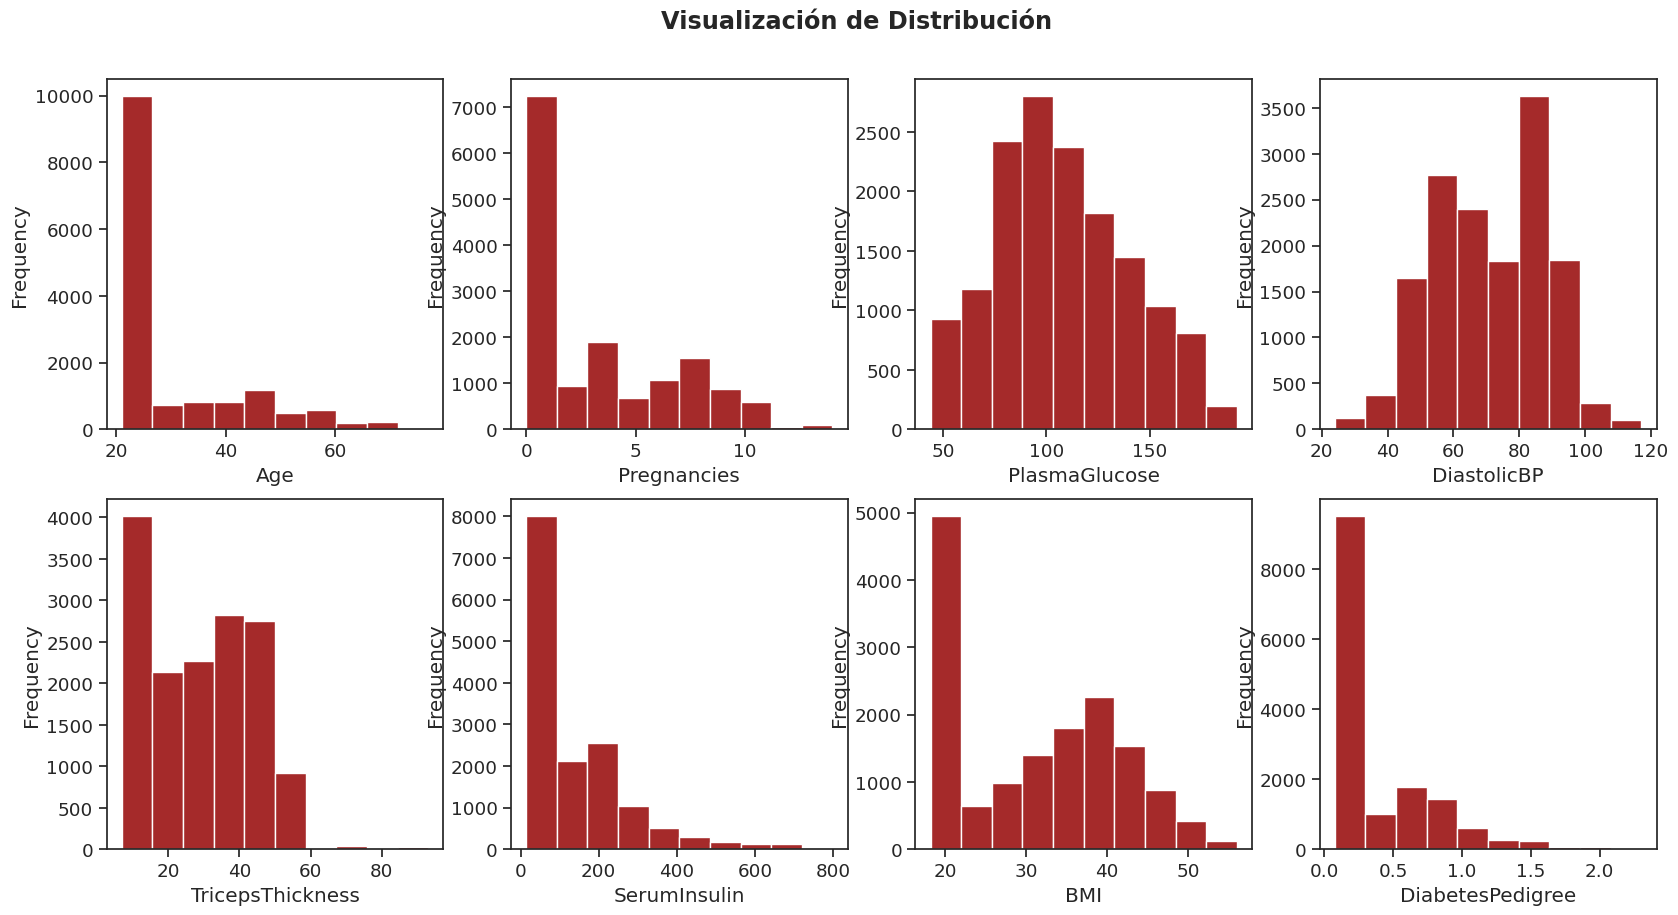

In [16]:
plot_features(diabetes_df)

Es posible ver que características como Edad, DiabetesPedigree, SerumInsulin e IMC parecen estar sesgadas hacia la derecha.

Esto se debe a una gran cantidad de valores más pequeños y a una distribución progresiva de menos valores grandes.

Mejorar la distribución usando el logaritmo de los valores, en lugar de los valores reales en estas características.

Esta es una parte del proceso de ingeniería de características en Machine Learning

In [17]:
for feature in ['Age', 'DiabetesPedigree', 'BMI', 'SerumInsulin']:
    print(feature)
    diabetes_df[feature] = diabetes_df[feature].apply(np.log)


Age
DiabetesPedigree
BMI
SerumInsulin


Nuevamente se revisa la distribución.

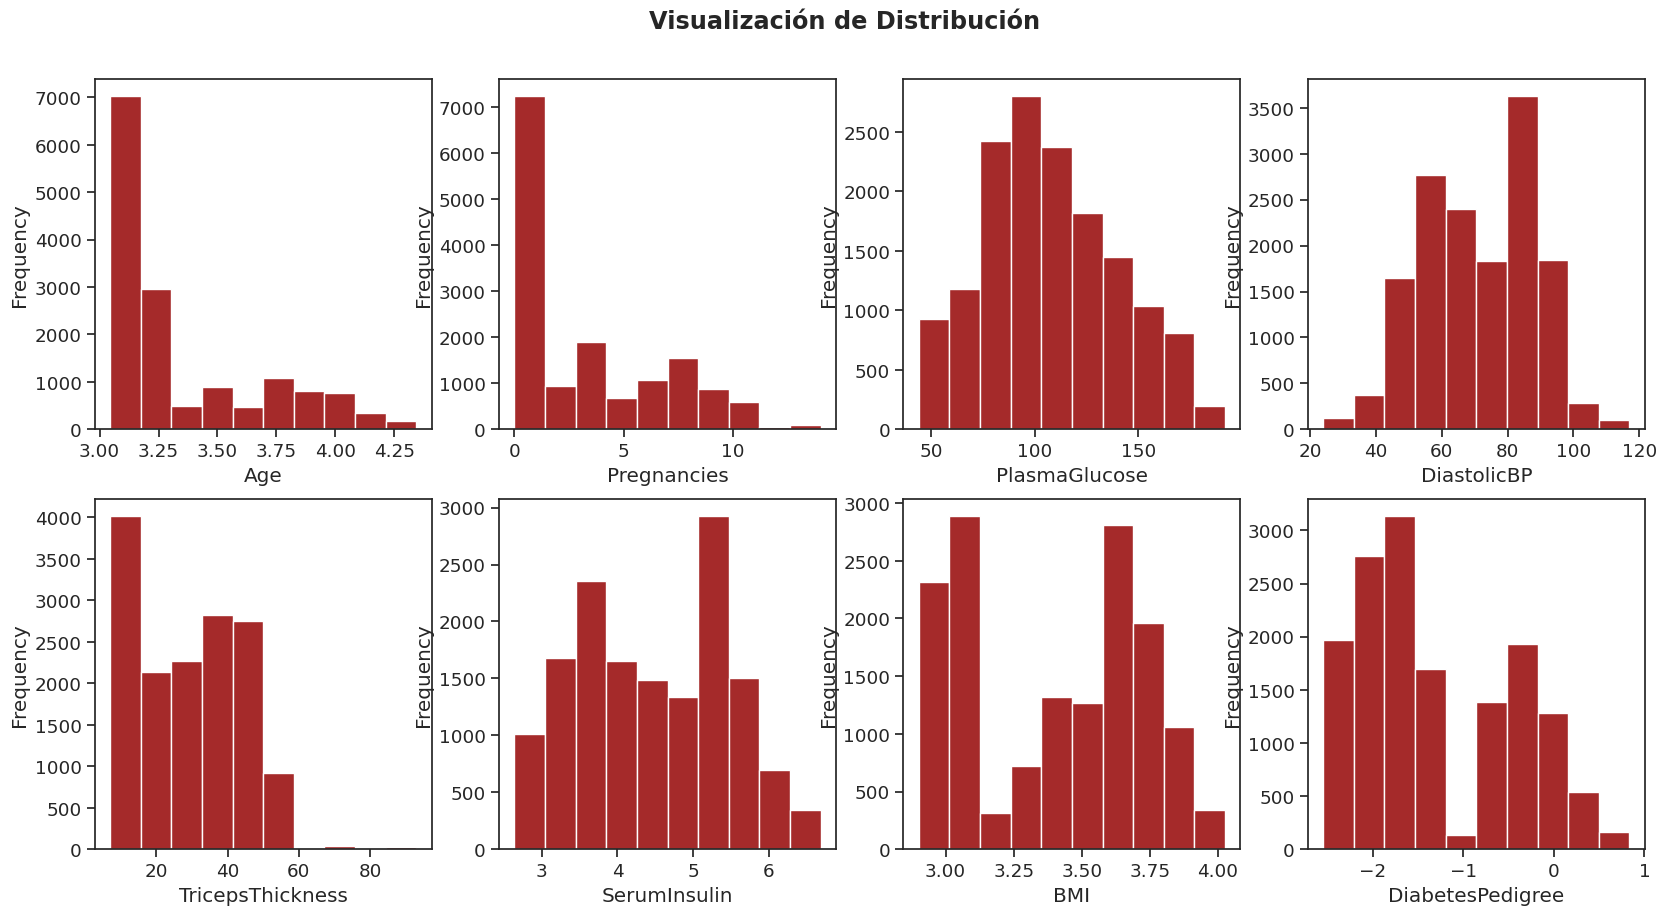

In [18]:
plot_features(diabetes_df)

De los gráficos anteriores, es posible ver una mejora en la distribución de las características.

---

Esto ayudará a lograr un mejor resultado cuando se entrene el modelo.

***
EJERCICIO : ¿Por qué tendremos un mejor resultado si cambiamos la distribución de los datos?
***

Bien, ahora se revisa el conjunto de datos que contiene los nombres de los médicos que tratan a nuestros respectivos pacientes.
Lo cargamos en un dataframe.

In [19]:
doctors_df = pd.read_csv('doctors.csv', encoding='latin-1')
doctors_df.head()

,PatientID,Physician
0,1000038,Jeanne Vestergaard
1,1000069,Sheldon Comeaux
2,1000118,Brain Dulaney
3,1000183,Alaine Poisson
4,1000326,Erik Collado


In [20]:
doctors_df.shape

(14895, 2)

In [21]:
doctors_df.isna().sum()

,0
PatientID,0
Physician,0


Entonces, es posible ver que los datos del Doctor son ligeramente más pequeños que el conjunto de datos de los pacientes.

Esto puede deberse al hecho de que algunos médicos vieron a más de un paciente.

***
 EJERCICIO : una ambas tablas. Debe tener cuidado de no perder pacientes (fíjese si la unión es por izquierda o derecha).
***

In [22]:
diabetes_doctor_df = pd.merge(diabetes_df, doctors_df, on="PatientID")

Ahora, es posible ver la columna de médicos adjunta y se puede decir qué médico trató a un paciente.

Se revisa la forma y también se verifica el número y las columnas con valores nulos

In [23]:
diabetes_doctor_df.shape

(15000, 11)

In [24]:
diabetes_doctor_df.isna().sum()

,0
PatientID,0
Pregnancies,0
PlasmaGlucose,0
DiastolicBloodPressure,0
TricepsThickness,0
SerumInsulin,0
BMI,0
DiabetesPedigree,0
Age,0
Diabetic,0


Verifica la cantidad de médicos únicos en la lista de médicos

In [25]:
diabetes_doctor_df.Physician.nunique()

# Deberá tener 109 doctores que han tratado a 15.000 pacientes

109

Verifica también la cantidad de pacientes únicos en el conjunto de datos

In [26]:
diabetes_doctor_df.PatientID.nunique()

14895

Ahora tiene sentido.

Hay 14895 pacientes únicos y los registros médicos tienen entradas para exactamente 14895 pacientes.

El hecho de que el conjunto de datos de los pacientes tenga 15000 entradas se debe simplemente a que algunos pacientes tenían varias entradas.

Dado que se fusionan los médicos y los pacientes en la columna de ID de paciente, la fusión asigna correctamente a cada médico a los pacientes que trató, aunque solo existen 109 médicos únicos.

In [27]:
diabetes_doctor_df.isna().sum()

,0
PatientID,0
Pregnancies,0
PlasmaGlucose,0
DiastolicBloodPressure,0
TricepsThickness,0
SerumInsulin,0
BMI,0
DiabetesPedigree,0
Age,0
Diabetic,0


### Preparación de datos

Como suele ser el caso con el aprendizaje automático de cualquier tipo, se requiere cierta preparación de datos antes de poder
use los datos para entrenar un modelo.

Se normalizan las características para que las características que tienen valores grandes no dominen el entrenamiento.

Al observar las formas de la distribución de cada característica, aquellas con una forma de campana de distribución más o menos normal se normalizarán mediante el método Zscore.

Mientras que aquellos con valores grandes y bajos variables se normalizarán utilizando el método Min-Max.

**1. Z-Score or Standard Score**_  
  

$Xnew =$ $Xold - mean \over STD(sigma)$

_**2. Min-Max Method**_  


$Xnew =$ $Xold - Xmin \over Xmax - Xmin$

***
EJERCICIO : Ahora se aplican estos métodos a las columnas seleccionadas usando el método adecuado.
***

In [28]:
for i in diabetes_doctor_df.columns[:-2]:
  mean = diabetes_doctor_df[i].mean()
  std = diabetes_doctor_df[i].std()
  mini = diabetes_doctor_df[i].min()
  maxi = diabetes_doctor_df[i].max()

  # if columns are not Age or Pregnancies, apply the Z_score norm method
  #
  if i not in ['Age', 'Pregnancies']:
    diabetes_doctor_df[i] = (diabetes_doctor_df[i] - mean)/std
  else:
    diabetes_doctor_df[i] = (diabetes_doctor_df[i] - mini)/(maxi - mini)


In [29]:
diabetes_doctor_df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Physician
0,-0.512160,0.000000,1.974335,0.523867,0.356286,-1.364665,1.165284,1.755479,0.000000,0,Dan Drayton
1,-1.228971,0.571429,-0.495806,1.299582,1.249406,-0.908607,-1.076800,-0.637939,0.070017,0,Anthony Frizzell
2,0.474010,0.500000,0.223349,-1.445258,1.592914,-0.937283,1.018286,-1.455161,0.070017,0,Gordon Fredrickson
3,1.315206,0.642857,-0.151863,0.404526,-0.262028,1.263156,-0.041044,1.821124,0.551595,1,Chad Corbitt
4,-0.272436,0.071429,-0.714680,-0.729213,-0.124625,-0.937283,1.099549,0.824581,0.035804,0,Zachary Fellows


Ahora que se han preparado el conjunto de datos, se usará para entrenar y evaluar una un clasificador.

Por lo general, cuando se entrena un modelo de aprendizaje supervisado, en el que los datos de entrenamiento incluyen
valores de etiqueta conocidos, se dividen los datos en un conjunto de entrenamiento con el que entrenar el modelo y un conjunto de prueba
con el que validar las predicciones generadas por el modelo entrenado.

Antes de continuar, se verifica la cantidad de observaciones que tiene cada clase de diabéticos o no diabéticos<br>

In [30]:
diabetes_doctor_df.Diabetic.value_counts()

,count
Diabetic,
0,10000
1,5000


Visualiza la distribución

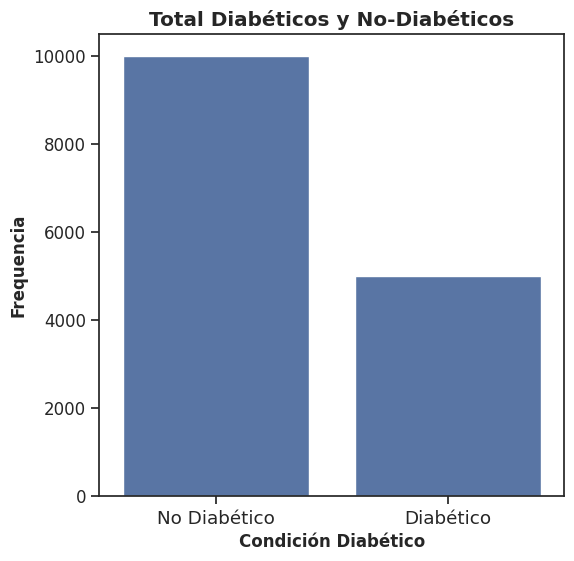

In [39]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(x=diabetes_doctor_df["Diabetic"])
ax.set_xticks([0, 1])
ax.set_xticklabels(["No Diabético", "Diabético"])
plt.title('Total Diabéticos y No-Diabéticos', fontweight="bold")
plt.xlabel('Condición Diabético', fontweight="bold", fontsize=12)
plt.ylabel('Frequencia', fontweight="bold", fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Es posible ver que de las 15 000 observaciones en nuestro conjunto de datos, la clase No diabético tiene 10 000 entradas, mientras que la clase Diabético tiene solo 5000 entradas.

Este es un conjunto de datos DESEQUILIBRADO y el riesgo que implica es que nuestro modelo puede aprender las características de una clase más que la otra.

Se necesita encontrar una manera de equilibrar el conjunto de datos para una clasificación más imparcial y confiable.

Antes de hacer la división, se seleccionan solo las columnas que importan anulando las columnas ID del paciente y Médico.

***
EJERCICIO : elimine las columnas indicadas
****

In [40]:
feature_matrix = diabetes_doctor_df.drop(['PatientID', 'Physician'], axis=1)
feature_matrix.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,0.000000,1.974335,0.523867,0.356286,-1.364665,1.165284,1.755479,0.000000,0
1,0.571429,-0.495806,1.299582,1.249406,-0.908607,-1.076800,-0.637939,0.070017,0
2,0.500000,0.223349,-1.445258,1.592914,-0.937283,1.018286,-1.455161,0.070017,0
3,0.642857,-0.151863,0.404526,-0.262028,1.263156,-0.041044,1.821124,0.551595,1
4,0.071429,-0.714680,-0.729213,-0.124625,-0.937283,1.099549,0.824581,0.035804,0


***
EJERCICIO : ASIGNE LA COLUMNA CON LA ETIQUETA
***

In [41]:
label = feature_matrix.Diabetic
label.head()

,Diabetic
0,0
1,0
2,0
3,1
4,0


In [42]:
feature_matrix.shape

(15000, 9)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, label, test_size=0.2, random_state=29)

print('X_train shape is',X_train.shape)
print('X_test shape is',X_test.shape)
print('y_train shape is',y_train.shape)
print('y_test shape is',y_test.shape)

X_train shape is (12000, 9)
X_test shape is (3000, 9)
y_train shape is (12000,)
y_test shape is (3000,)


# Decision Tree Classifier

In [44]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Función que devuelva el mejor modelo clasificador de árbol de decisión y genere sus parámetros y un gráfico de la matriz de confusión.

In [45]:
# set max depth range limit for DTree model to iterate through from 1 to 100 to find best parameters


def best_decision_tree_classifier(X_train, X_test, y_train, y_test):
    max_depth = 100
    accuracy_dict={'max_depth':0, 'val_acc':0, 'f1_Score':0, 'log_loss':0}

    for i in range(1, max_depth+1):
            # Let's instantiate a model
            decision_model = DecisionTreeClassifier(criterion='entropy', max_depth = i)

            # Let's train the model
            decision_model.fit(X_train, y_train)

            # Let's make prediction on the test data
            y_hat = decision_model.predict(X_test)

            # Let's measure accuracy of predictions on test data
            val_accu = round(accuracy_score(y_test, y_hat),4)

            # Let's Measure the F1 Score
            val_f1 = round(f1_score(y_test, y_hat, average='weighted'),4)

            # Let's Measure Logloss
            logloss = round(log_loss(y_test, y_hat, normalize=True),4)

            if accuracy_dict['val_acc'] < val_accu or accuracy_dict['f1_Score'] < val_f1:
                accuracy_dict['max_depth'] = i
                accuracy_dict['val_acc'] = val_accu
                accuracy_dict['f1_Score'] = val_f1
                accuracy_dict['log_loss'] = logloss
                decision_model = decision_model

            # Compute confusion matrix
            Dtrees_cnf_matrix = confusion_matrix(y_test, y_hat, labels=[0,1])
            np.set_printoptions(precision=2)

            TP = Dtrees_cnf_matrix[0,0]
            FP = Dtrees_cnf_matrix[0,1]
            FN = Dtrees_cnf_matrix[1,0]
            TN = Dtrees_cnf_matrix[1,1]

            accuracy = (TP + TN) / (TP + TN + FP + FN)
            recall = TP / (TP + FN)
            precision = TP / (TP + FP)

    # Plot non-normalized confusion matrix
    plt.figure(figsize=(10, 6))
    sns.set(font_scale=1.3)
    plot_confusion_matrix(Dtrees_cnf_matrix,
                          classes=['Clase negativa','Clase positiva'],
                          normalize= False,
                          title='Matriz de confusión para Decision-Tree-Classifier')
    plt.show()
    print()

    print('TP is:',TP,'FP is:',FP,'TN is:',TN,'FN is:',FN)
    print()
    print('Model Evaluation:')
    print(accuracy_dict)
    print()
    #plot_roc_chart(decision_model)
    print()
    print('accuracy is:',round(accuracy,2))
    print('recall is:',round(recall,2))
    print('precision is:',round(precision,2))
    print()

    return decision_model

Confusion matrix, without normalization
[[2020    0]
 [   0  980]]


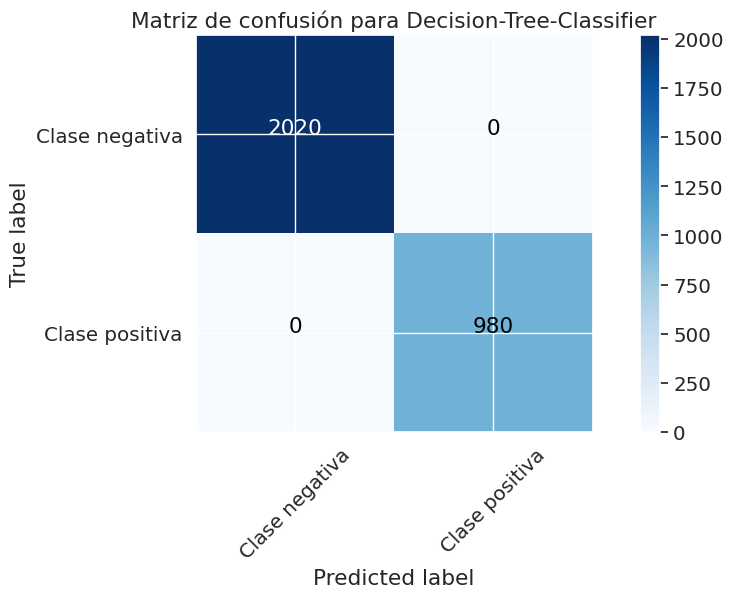


TP is: 2020 FP is: 0 TN is: 980 FN is: 0

Model Evaluation:
{'max_depth': 1, 'val_acc': 1.0, 'f1_Score': 1.0, 'log_loss': 0.0}


accuracy is: 1.0
recall is: 1.0
precision is: 1.0



DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [46]:
decision_tree_classifier = best_decision_tree_classifier(X_train, X_test, y_train, y_test)
decision_tree_classifier

##Notas


+ La `Matriz de Confusión` muestra el número de Verdaderos Positivos y Verdaderos Negativos (casos
correctamente clasificados) y Falsos Negativos y Falsos Positivos (casos incorrectamente clasificados).

+ `Accuracy` es la fracción de casos clasificados correctamente.
+ `Recall`, es la fracción de casos positivos clasificados correctamente del total de casos positivos en el conjunto de datos.
+ `Precision` es la fracción de casos positivos clasificados correctamente de todos los casos clasificados como positivos.

****
EJERCICIO:

1.   Comente los valores de la métricas
2.   ¿Cuál es el efecto que produce en ellas que los datos estén DESBALANCEADOS?
3.   ¿Cuál es el valor de F1 SCORE?

*****
